# Avdhut Kumbhar

## Task1 : Prediction using Supervised ML

## Predict the percentage of an student based on the no. of study hours.

### This is a simple linear regression task as it involves just 2 variables.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

# Loading Data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully.")
data.head()

Data imported successfully.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.isna().sum()   #checking for na or null (data.isnull()) values

Hours     0
Scores    0
dtype: int64

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

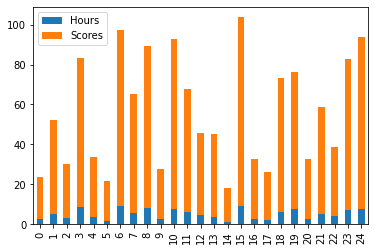

In [6]:
data.plot.bar(stacked = True)

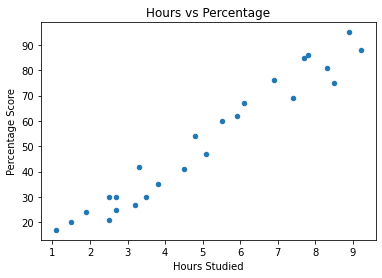

In [7]:
#Scatter Plot
data.plot.scatter(x='Hours',y='Scores')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<Figure size 864x504 with 0 Axes>

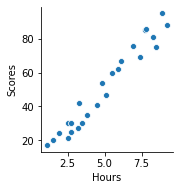

In [8]:
plt.figure(figsize=(12,7))
sns.pairplot(data, x_vars='Hours', y_vars='Scores')
plt.show()

In [9]:
#some important laibraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.metrics as sm

# Preparing the Data
Here we divide the data into features and target variables

In [10]:
x=data.iloc[:,0].values
y=data.iloc[:,1].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)

# Splitting the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, train_size = 0.8)

In [12]:
print(X_train.shape)
print(y_train.shape)

(20, 1)
(20, 1)


In [13]:
print(X_test.shape)
print(y_test.shape)

(5, 1)
(5, 1)


# Training Of Model
We use Linear Regression model

In [14]:
from sklearn.linear_model import LinearRegression
# Creating an object of Linear Regression
lm = LinearRegression()
#model fitting
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# Intercept value
print("Intercept :",lm.intercept_)
# Slope value
print('Slope :',lm.coef_)

Intercept : [0.64380599]
Slope : [[10.03655922]]


# Regression line

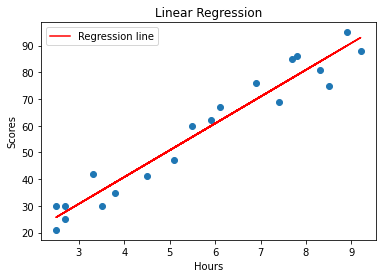

In [16]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, lm.intercept_+(lm.coef_*X_train), 'r', label='Regression line')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

Here the relationship between the two variables is postive linear that is as the number of study hours increases the score also increases.

# Predictions

In [17]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train)
y_pred = lm.predict(X_test)

In [18]:
# Importing r2_square
from sklearn.metrics import r2_score

# Comparing the r2 value of both train and test data
print("R² train_data :", r2_score(y_train,y_train_pred))
print("R² test_data :",r2_score(y_test,y_pred))

R² train_data : 0.9448452304790024
R² test_data : 0.8573143264573445


In [19]:
#Comparing actual and predicted values
d1 = pd.DataFrame(y_test)
d2 = pd.DataFrame(y_pred)
d = pd.concat([d1,d2], axis=1)
d.columns=['Actual', 'Predicted']
d

,Actual,Predicted
0,17,11.684021
1,24,19.713269
2,27,32.760795
3,20,15.698645
4,54,48.819290


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [20]:
pred = lm.predict([[9.25]])
pred

array([[93.48197879]])

The predicted score is if a student studies for 9.25 hrs/ day is 93.4819

# Accuracy of model

In [21]:
print("Mean absolute error :", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", metrics.mean_squared_error(y_test, y_pred))
print("R^2ed :", metrics.r2_score(y_test, y_pred))

Mean absolute error : 4.969114156649579
Mean Squared Error : 25.032774566323475
R^2ed : 0.8573143264573445


R-squared reveals that 85% of the data fit the regression model.

# Thank You !